<div width="100%" style="background-color:#434447;">
<img src="https://d24cdstip7q8pz.cloudfront.net/t/t20161026195759/content/common/images/1404.png" /></div>

<center>
# HDFC stock price prediction
<center>

In [1]:
# IMPORT upx MODULE
import upx

In [2]:
dataMaster = upx.pd.read_csv('D:/Time_series/NSE-HDFC.csv') # Loading the data
print dataMaster.head() # Have a look at the data set

         Date     Open     High      Low    Close   Volume  Adj Close
0  03-04-2017  1446.00  1499.00  1425.05  1496.60  1536500    1496.60
1  01-03-2017  1396.45  1479.95  1369.00  1442.55  1679400    1442.55
2  01-02-2017  1286.20  1454.00  1280.50  1390.10  6639200    1390.10
3  02-01-2017  1209.45  1300.00  1183.10  1286.65  1562600    1286.65
4  01-12-2016  1202.30  1212.00  1163.60  1206.20  1113300    1206.20


In [3]:
hdfc_close = dataMaster['Close'] # concerned column is 'Close' column
print hdfc_close.head()

0    1496.60
1    1442.55
2    1390.10
3    1286.65
4    1206.20
Name: Close, dtype: float64


In [4]:
# Parse data to datetime64 type
ran = upx.pd.date_range('1996-01','2017-05',  freq = 'M') # range of our time series data
print ran
ts = upx.pd.Series(dataMaster['Close'].values, index = ran[::-1]) # parsing the data to timeseries
ts = ts[::-1]

DatetimeIndex(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30',
               '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31',
               '1996-09-30', '1996-10-31',
               ...
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30'],
              dtype='datetime64[ns]', length=256, freq='M')


In [5]:
print ts.head(12) # First 12 elements of ts
print ts.dtypes # This will output the structure of the pandas object
# We do this to make sure we have a time series object!
print ran # We print the range to be sure we have it formatted correctly


1996-01-31    5.18
1996-02-29    6.13
1996-03-31    6.49
1996-04-30    7.09
1996-05-31    6.83
1996-06-30    7.98
1996-07-31    7.04
1996-08-31    7.37
1996-09-30    7.16
1996-10-31    7.54
1996-11-30    7.60
1996-12-31    7.84
Freq: M, dtype: float64
float64
DatetimeIndex(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30',
               '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31',
               '1996-09-30', '1996-10-31',
               ...
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30'],
              dtype='datetime64[ns]', length=256, freq='M')


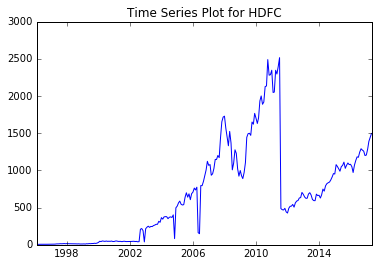

In [6]:
# Plot the data
%matplotlib inline
upx.plt.plot(ts)
upx.plt.title('Time Series Plot for HDFC')
upx.plt.show()

In [7]:
HDFC_TR = ts['1996':'2016']
print HDFC_TR.head()

1996-01-31    5.18
1996-02-29    6.13
1996-03-31    6.49
1996-04-30    7.09
1996-05-31    6.83
Freq: M, dtype: float64


C:\Users\SM00493336\AppData\Local\Enthought\Canopy\User\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


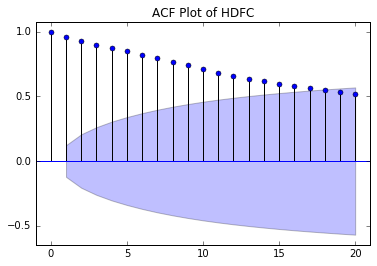

In [8]:
#Auto Correlation Function plot for original data
acf = upx.plot_acf(ts, lags = 20)
upx.plt.title("ACF Plot of HDFC")
acf.show()

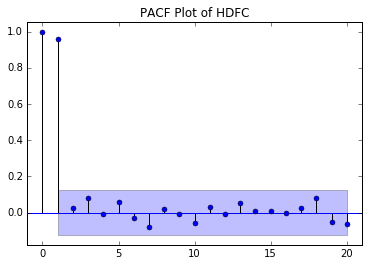

In [9]:
#Partial Auto Correlation Function plot for original data
pacf = upx.plot_pacf(ts, lags = 20)
upx.plt.title("PACF Plot of HDFC")
pacf.show()

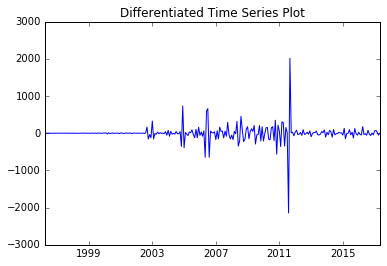

In [10]:
diff = upx.differentiate(ts) #Differentiate to make the series almost stationary

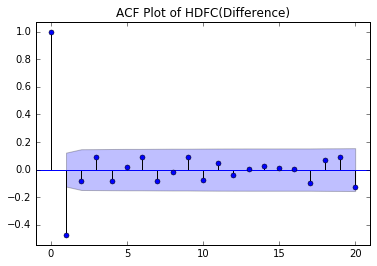

In [11]:
acfDiff = upx.plot_acf(diff, lags = 20) #Auto Correlation Function plot for differentiated data
upx.plt.title("ACF Plot of HDFC(Difference)")

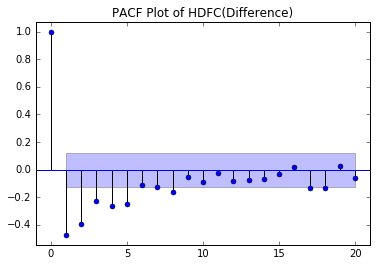

In [12]:
pacfDiff = upx.plot_pacf(diff, lags = 20) # Partial Auto correlation function plot for differentiated data
upx.plt.title("PACF Plot of HDFC(Difference)")

In [13]:
results = upx.ARIMA222(HDFC_TR) # Our Modeling algorithm using ARIMA(2,2,2)

C:\Users\SM00493336\AppData\Local\Enthought\Canopy\User\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [14]:
# Here's us predicting till July 2016
predVals = results.predict(228, 246, typ='levels')
print predVals

2015-01-31     970.689000
2015-02-28    1062.742196
2015-03-31    1068.197027
2015-04-30    1017.682364
2015-05-31    1003.149672
2015-06-30    1043.746398
2015-07-31    1076.549815
2015-08-31    1107.426084
2015-09-30    1037.594278
2015-10-31    1069.930043
2015-11-30    1102.120547
2015-12-31    1080.706112
2016-01-31    1087.364575
2016-02-29    1051.753547
2016-03-31     979.888682
2016-04-30    1072.195149
2016-05-31    1130.413533
2016-06-30    1186.069704
2016-07-31    1176.620508
Freq: M, dtype: float64


In [15]:
predVals = predVals.drop(predVals.index[0])
print predVals

2015-02-28    1062.742196
2015-03-31    1068.197027
2015-04-30    1017.682364
2015-05-31    1003.149672
2015-06-30    1043.746398
2015-07-31    1076.549815
2015-08-31    1107.426084
2015-09-30    1037.594278
2015-10-31    1069.930043
2015-11-30    1102.120547
2015-12-31    1080.706112
2016-01-31    1087.364575
2016-02-29    1051.753547
2016-03-31     979.888682
2016-04-30    1072.195149
2016-05-31    1130.413533
2016-06-30    1186.069704
2016-07-31    1176.620508
Freq: M, dtype: float64


In [16]:
HDFC_for = upx.pd.concat([ts, predVals], axis = 1, keys=['original', 'predicted'])
print HDFC_for['2015':'2016']

            original    predicted
2015-01-31   1077.35          NaN
2015-02-28   1054.00  1062.742196
2015-03-31   1022.70  1068.197027
2015-04-30    988.80  1017.682364
2015-05-31   1050.55  1003.149672
2015-06-30   1067.15  1043.746398
2015-07-31   1111.65  1076.549815
2015-08-31   1027.45  1107.426084
2015-09-30   1068.80  1037.594278
2015-10-31   1099.60  1069.930043
2015-11-30   1077.75  1102.120547
2015-12-31   1082.15  1080.706112
2016-01-31   1049.85  1087.364575
2016-02-29    971.85  1051.753547
2016-03-31   1071.15   979.888682
2016-04-30   1132.35  1072.195149
2016-05-31   1181.90  1130.413533
2016-06-30   1176.45  1186.069704
2016-07-31   1246.20  1176.620508
2016-08-31   1291.20          NaN
2016-09-30   1272.85          NaN
2016-10-31   1259.05          NaN
2016-11-30   1199.60          NaN
2016-12-31   1206.20          NaN


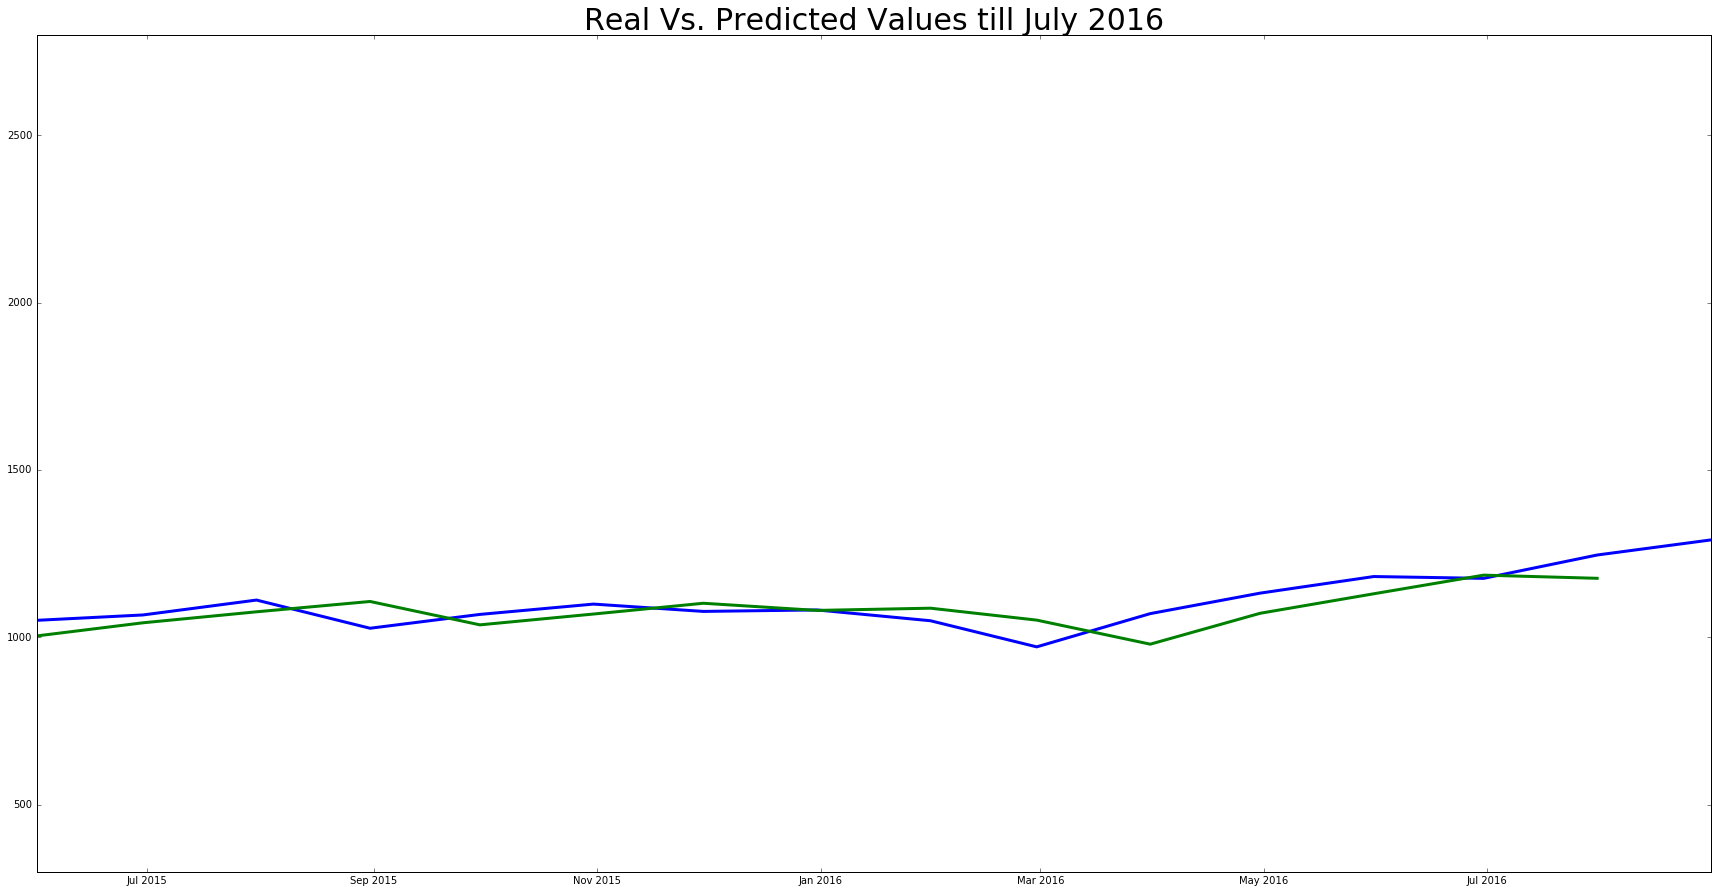

In [17]:
upx.rcParams['figure.figsize'] = 30, 15
upx.plt.figure()
upx.plt.plot(HDFC_for,linewidth=3.0)
upx.plt.xlim(upx.pd.Timestamp('2015-06-01'), upx.pd.Timestamp('2016-08-31'))
upx.plt.ylim([300, 2800])
upx.plt.title('Real Vs. Predicted Values till July 2016',fontsize=30)
upx.plt.show()

### Did you notice a lag of around one month in our prediction ?
#### Let's fix this

In [18]:
# Here's us predicting for months Aug,Sep, Oct, Nov, Dec 2016
predVals_lag = results.predict(246, 252, typ='levels')
predVals_lag = predVals_lag.drop(predVals_lag.index[0])
print predVals_lag
HDFC_for_lag = upx.pd.concat([ts, predVals_lag], axis = 1, keys=['original', 'predicted'])
HDFC_for_lag.predicted = HDFC_for_lag.predicted.shift(-1) # Adjusting the lag

2016-08-31    1252.484118
2016-09-30    1287.518178
2016-10-31    1282.130740
2016-11-30    1259.207360
2016-12-31    1209.188032
2017-01-31    1208.071024
Freq: M, dtype: float64


In [19]:
print HDFC_for_lag['2016-07-31':'2016-12-31']

            original    predicted
2016-07-31   1246.20  1252.484118
2016-08-31   1291.20  1287.518178
2016-09-30   1272.85  1282.130740
2016-10-31   1259.05  1259.207360
2016-11-30   1199.60  1209.188032
2016-12-31   1206.20  1208.071024


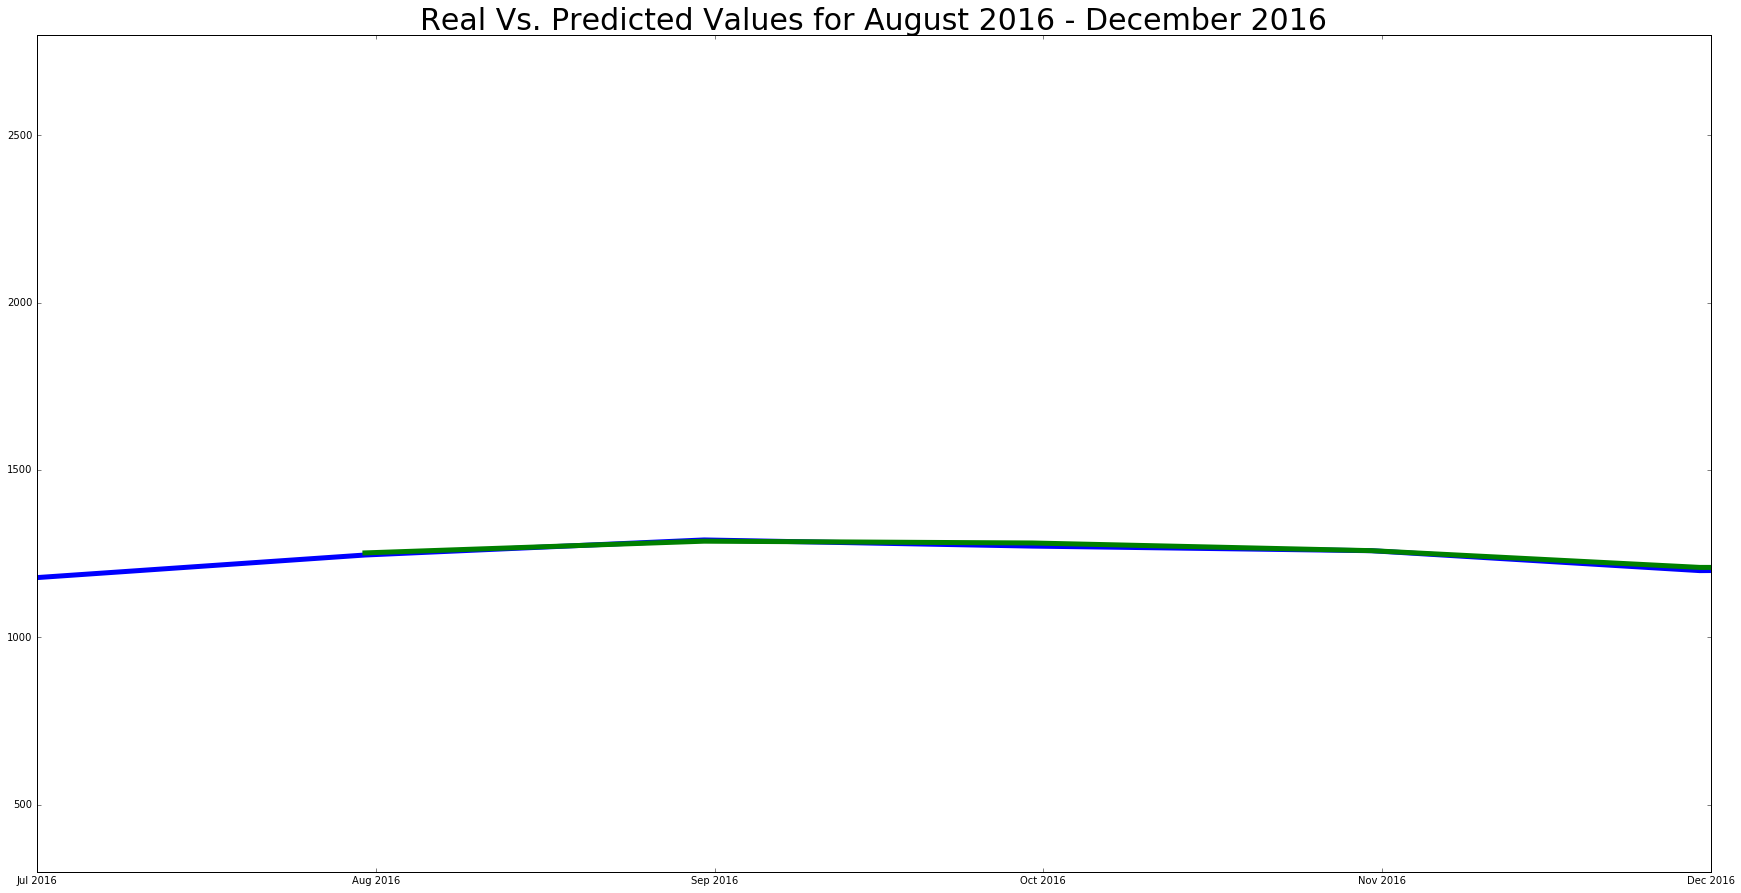

In [20]:
upx.plt.figure()
upx.plt.plot(HDFC_for_lag,linewidth=5.0)
upx.plt.xlim(upx.pd.Timestamp('2016-07-01'), upx.pd.Timestamp('2016-12-01'))
upx.plt.ylim([300, 2800])
upx.plt.title('Real Vs. Predicted Values for August 2016 - December 2016',fontsize=30)
upx.plt.show()

# Got the magic stick? Yes/No
<img src="http://www.koantic.com/demos/videoWithPhone/assets/GzSEgwsueoFgJv3jB.gif" />